In [1]:
import torch
from torch import optim
from torch import nn
from captcha.image import ImageCaptcha
from captcha_loader import Captcha
from captcha_loader import StrtoLabel, LabeltoStr
from torch.utils.data import DataLoader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import captcha_resnet
from PIL import Image

In [2]:
# These parameters should be configured to be compatible with your model
model_type = 'wide_resnet'
image_width = 32
image_height = 32
batch_size = 256
num_char = 4

num_classes = len(string.ascii_uppercase + string.ascii_lowercase + string.digits)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if model_type == "resnet18":
    model = captcha_resnet.resnet18(num_classes = num_classes, num_char = num_char).to(device)
elif model_type == "resnet34":
    model = captcha_resnet.resnet34(num_classes = num_classes, num_char = num_char).to(device)
elif model_type == "resnet50":
    model = captcha_resnet.resnet50(num_classes = num_classes, num_char = num_char).to(device)
elif model_type == "wide_resnet":
    model = captcha_resnet.wide_resnet50_2(num_classes = num_classes, num_char = num_char).to(device)
else:
    print("No model")
model.eval()
print("Done loading")

Done loading


In [3]:
log_file = 'trained/resnet34_log.pkl'
print("Load file at ", log_file)
unpickled_df = pd.read_pickle(log_file)

Load file at  trained/resnet34_log.pkl


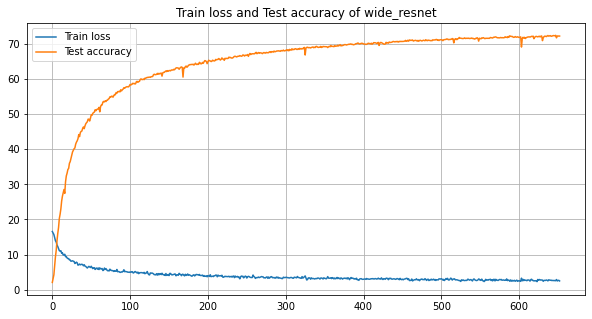

In [4]:
fig = plt.figure(figsize = (10,5))
plt.plot(unpickled_df['loss'], label="Train loss")
plt.plot(unpickled_df['test Acc'] , label="Test accuracy")
title = "Train loss and Test accuracy of " + model_type
plt.title(title)
plt.grid()
plt.legend(loc="upper left")
plt.show()
fig.savefig("test_folder/" + title + ".png")

In [16]:
test_string = "XlAP"

captcha = ImageCaptcha()
captcha.write(test_string, 'test_folder/' + test_string +'.png')

test_image = Captcha('test_folder',image_width, image_height, train=True)
testLoader = DataLoader(test_image)
model_input, label = next(iter(testLoader))
gt = [int(l.item()) for l in list(label[0])]

preds = model(model_input.to(device))
pred_string = [torch.argmax(pred).item() for pred in preds]
print("Ground truth: " + LabeltoStr(gt))
print("Prediction: " +LabeltoStr(pred_string))

Ground truth: XlAP
Prediction: XlAP


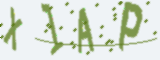

In [17]:
# creating a object
im = Image.open('test_folder/' + test_string +'.png')
im